In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Задание 1

## Accessing and Modifying pixel values

In [62]:
img = cv.imread('data/car2.jpg')
img2 = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

print(img[20, 20], " BGR")
print(img2[20, 20], " Grayscale")
print(img[20, 20, 1], " Green color value")

img[35, 20] = [255, 255, 255]
print(img[35, 20], " Modified pixel")

#using numpy item()
print(img.item(20, 20, 1), " Green color numpy value")
img.itemset((35, 20, 1), 147)
print(img[35, 20], " Modified pixel 2")


[ 74  97 105]  BGR
97  Grayscale
97  Green color value
[255 255 255]  Modified pixel
97  Green color numpy value
[255 147 255]  Modified pixel 2


## Accessing Image Properties

In [38]:
print(img.shape)

(720, 720, 3)


In [39]:
print(img.size)

1555200


In [40]:
print(img.dtype)

uint8


## Image ROI

In [63]:
img2 = img

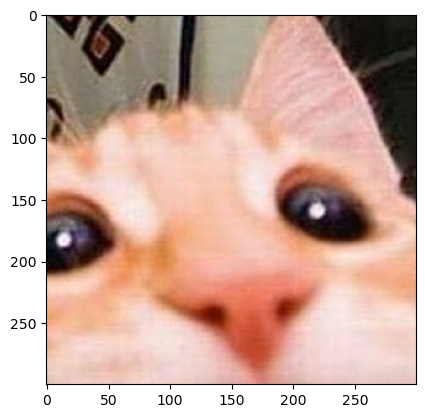

In [64]:
some_area = img2[200:500, 200:500]
plt.imshow(cv.cvtColor(some_area, cv.COLOR_BGR2RGBA))

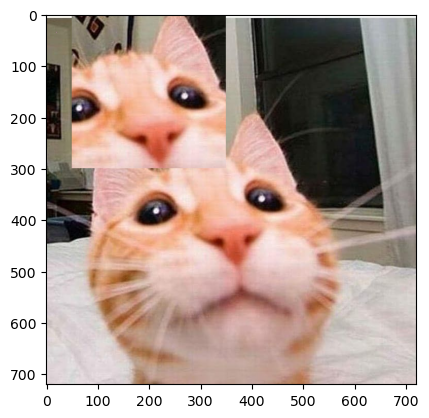

In [65]:
img2[0:300, 50:350] = some_area
plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGBA))

## Splitting and Merging Image Channels

In [69]:
b,g,r = cv.split(img)
b

array([[252, 252, 252, ..., 254, 255, 255],
       [254, 254, 254, ..., 255, 255, 255],
       [250, 250, 250, ..., 252, 252, 252],
       ...,
       [219, 219, 218, ..., 200, 201, 201],
       [219, 218, 217, ..., 198, 198, 199],
       [218, 218, 217, ..., 197, 197, 197]], dtype=uint8)

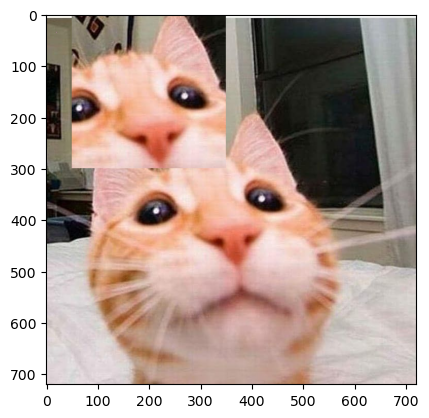

In [70]:
img4 = cv.merge((b, g, r))
plt.imshow(cv.cvtColor(img4, cv.COLOR_BGR2RGBA))

In [71]:
b = img[:,:,0]
b

array([[252, 252, 252, ..., 254, 255, 255],
       [254, 254, 254, ..., 255, 255, 255],
       [250, 250, 250, ..., 252, 252, 252],
       ...,
       [219, 219, 218, ..., 200, 201, 201],
       [219, 218, 217, ..., 198, 198, 199],
       [218, 218, 217, ..., 197, 197, 197]], dtype=uint8)

## Making Borders for Images (Padding)

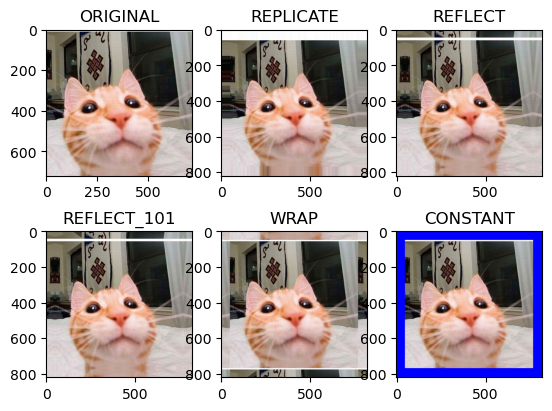

In [3]:
BLUE = [0,0,255]
 
img1 = cv.imread('data/car2.jpg')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
 
#replicate last elem 
replicate = cv.copyMakeBorder(img1,50,50,50,50,cv.BORDER_REPLICATE)
#reflect like a mirror
reflect = cv.copyMakeBorder(img1,50,50,50,50,cv.BORDER_REFLECT)
#idk
reflect101 = cv.copyMakeBorder(img1,50,50,50,50,cv.BORDER_REFLECT_101)
#idk
wrap = cv.copyMakeBorder(img1,50,50,50,50,cv.BORDER_WRAP)
#just a border
constant = cv.copyMakeBorder(img1,50,50,50,50,cv.BORDER_CONSTANT,value=BLUE)
 
plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
 
plt.show()

# Задание 2

## Image Addition

In [82]:
x = np.uint8([250])
y = np.uint8([10])
print( cv.add(x,y) )
print( x+y )

[[260.]
 [  0.]
 [  0.]
 [  0.]]
[4]


## Image Blending

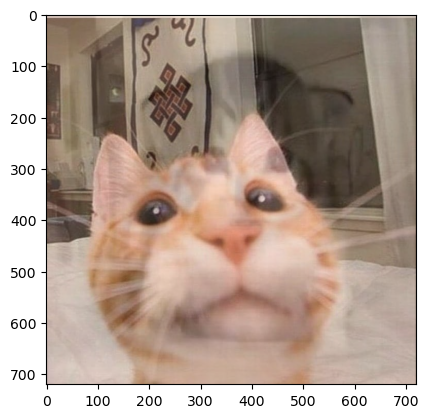

In [92]:
img1 = cv.imread('data/car2.jpg')
img2 = cv.imread('data/car1.jpg')
img2 = cv.resize(img2, (img1.shape[0], img1.shape[1]))

final_img = cv.addWeighted(img1, 0.6, img2, 0.4, 0)
plt.imshow(cv.cvtColor(final_img, cv.COLOR_BGR2RGBA))

## Bitwise Operations
https://docs.opencv.org/4.10.0/d0/d86/tutorial_py_image_arithmetics.html

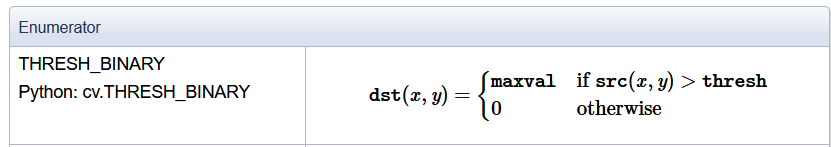

MASK


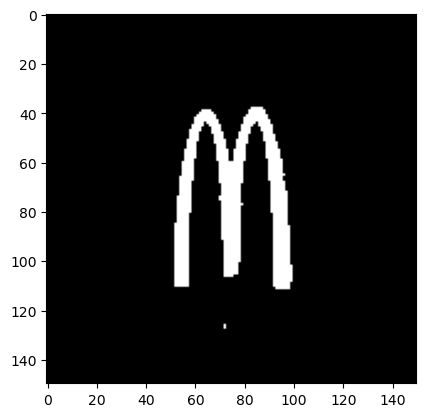

INVERSE MASK


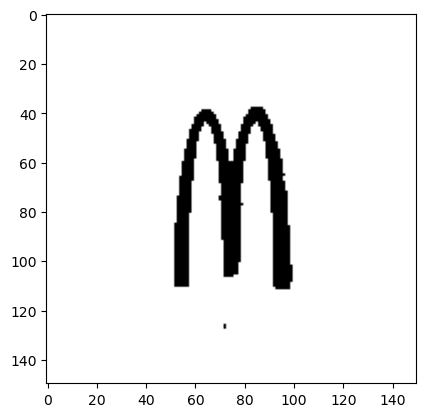

MASK ON ROI


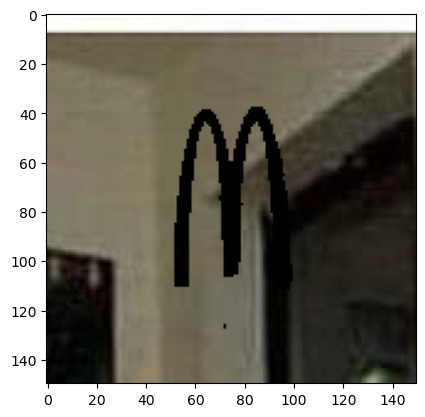

REGION FROM ORIGINAL LOGO


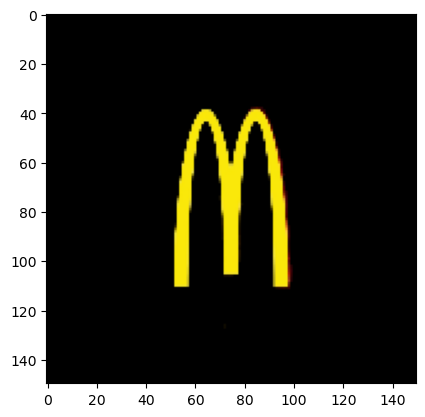

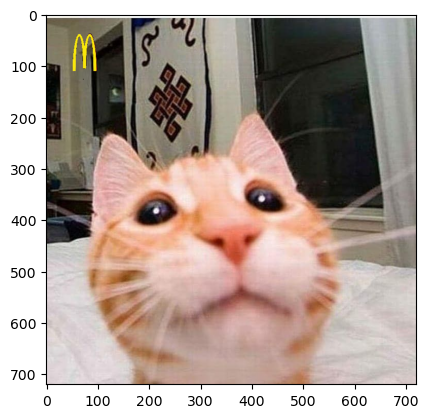

In [12]:
# Load two images
img1 = cv.imread('data/car2.jpg')
img2 = cv.imread('data/logo2.jpg')
img2 = cv.resize(img2, (150, 150))
 
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols]
 
# Now create a mask of logo and create its inverse mask also
img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
#change trehshold
ret, mask = cv.threshold(img2gray, 10, 255, cv.THRESH_BINARY)
print("MASK")
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGBA))
plt.show()
mask_inv = cv.bitwise_not(mask)
print("INVERSE MASK")
plt.imshow(cv.cvtColor(mask_inv, cv.COLOR_BGR2RGBA))
plt.show()
 
# Now black-out the area of logo in ROI
img1_bg = cv.bitwise_and(roi,roi,mask = mask_inv)
print("MASK ON ROI")
plt.imshow(cv.cvtColor(img1_bg, cv.COLOR_BGR2RGBA))
plt.show()
 
# Take only region of logo from logo image.
img2_fg = cv.bitwise_and(img2,img2,mask = mask)
print("REGION FROM ORIGINAL LOGO")
plt.imshow(cv.cvtColor(img2_fg, cv.COLOR_BGR2RGBA))
plt.show()
 
# Put logo in ROI and modify the main image
dst = cv.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
 
plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGBA))